# Сборный проект № 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

# 1. Изучение данных

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns


In [2]:
#посмотрим на данные
try:
    data = pd.read_csv('C:/Users/79811/Downloads/games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**ВЫВОД**

Опишем, что мы видем: 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке 
- EU_sales — продажи в Европе 
- JP_sales — продажи в Японии 
- Other_sales — продажи в других странах 
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными исходя из предоставленных данных

**Что необходимо изменить**:
- изменить тип данных
- привести всё к змеиному регистру
- избавиться от пропусков

**Выводы по данным**:
- Имеющиеся пропуски возможнос связаны с большим периодом сбора данных о продажах игр ли же их просто не заполняли
- Необходимо посчитать и добавить суммарные продажи во всех регионах 



# 2. Подготовка данных

In [4]:
data.info() #ещё раз выведем информацию на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#приведем все колонки к змеиному регистру
#data.columns
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#data['user_score'] = data['user_score'].astype('float64') - тут я хотел перевети значения в float, но не получилось
#предлагаюю заменить занчения tbd  на NaN и после переводить в float64
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Столбец с рейтигами предлагаю сразу категоризировать по формату американских рейтингов на количественные категории, которые можно будет в последствии сравнить. Пропуски заменим на информацию - no_info и переведем в формат float

In [8]:
data_rating = (data #смотримна суммы рейтингв 
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
)
data_rating

,na_sales
,sum
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56
EC,1.53
AO,1.26
RP,0.00


In [9]:
data['rating'] = data['rating'].replace('M', 15)
data['rating'] = data['rating'].replace('E', 6)
data['rating'] = data['rating'].replace('T', 13)
data['rating'] = data['rating'].replace('E10+', 10)
data['rating'] = data['rating'].replace('K-A', 10)
data['rating'] = data['rating'].replace('EC', 3)
data['rating'] = data['rating'].replace('AO', 3)
data['rating'] = data['rating'].replace('RP', np.nan)

- EC - 3+
- E - 6+ (everyone)
- E10+ - 10+
- K-A - 10+
- T - 13+
- M - 15+
- AO - 18+
- RP - pending

In [10]:
data['rating'].value_counts() #проверяем замену 

6.0     3990
13.0    2961
15.0    1563
10.0    1423
3.0        9
Name: rating, dtype: int64

In [11]:
data['rating'] = data['rating'].fillna('no_info') #заменяем пропущенные значения

In [12]:
data['rating'].head(10) #проверяем

0          6
1    no_info
2          6
3          6
4    no_info
5    no_info
6          6
7          6
8          6
9    no_info
Name: rating, dtype: object

**Посчитаем и добавим суммарные продажи во всех регионах** 

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
data['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

In [15]:
data.head() # проверяем добавление

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,6,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,6,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


**Вывод**

Наличие пропусков в данных можно объяснить не ошибкой, а отутствием данных, так что заменить на медианные значения будет не логично. Рейтинг на формат int не стал менять, т.к. можем получить десятичное число и окргулять будет не логично.

# 3. Анализ данных

- Посмотрим, сколько игр выпускалось в разные годы. Будут ли важны данные за все периоды? 


- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Оценим за какой характерный срок появляются новые и исчезают старые платформы.


- Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно из результатов исследования предыдущих вопросов. Основноым фактором будет — эти данные помогут построить прогноз на 2017 год. 


- Не будем учитывать в работе данные за предыдущие годы. 


- Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ. 


- Построим график «ящика с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат. 


- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. 


- Соотнесём выводы с продажами игр на других платформах. 


- Посмотрим на общее распределение игр по жанрам:
1. Что можно будет сказать о самых прибыльных жанрах
2. Выделяются ли жанры с высокими и низкими продажами

Для начала посмотрим сколько игр выпускалось в разные годы

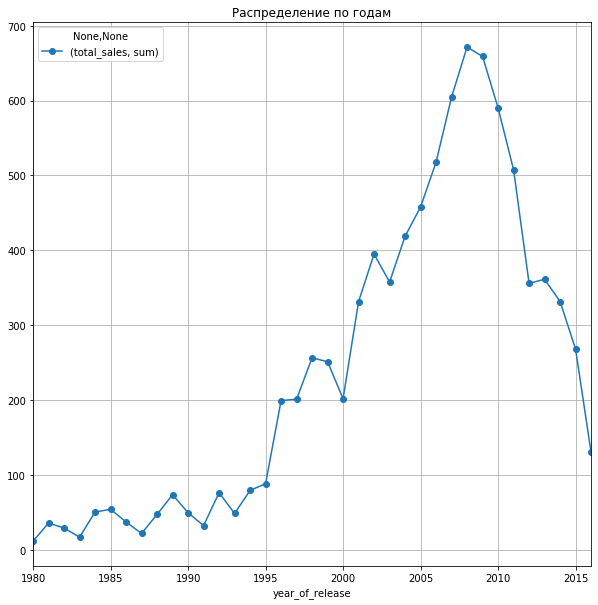

In [17]:
(data
    .groupby('year_of_release')
    .agg({'total_sales':['sum']})
    .plot(legend=True, style='o-', grid=True, figsize=(10, 10),title='Распределение по годам')
)

Исходя из построенного графика видим:
- Рост продаж начиная с 1996 года (думаю связан с технологическим прогрессом
- Падение продаж начиная с 2008 года (думаю связано с экономическим кризисом того времени)
- Основной период приходится с 2000 до 2015 года (зачеркнуто)

Будем рассматривать период с 2009 по 2015 года, считая их самыми актуальными

- Актуальными данными возьмем с 2013 по 2016 год

 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Оценим за какой характерный срок появляются новые и исчезают старые платформы.

In [18]:
#создаем сводную таблицу
top_platforms = (data
    .query('2013 <= year_of_release <= 2016')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
top_platforms

,total_sales
,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


In [19]:
platform_all = (data
    .query('platform in @top_platforms.index and 2013 <= year_of_release <= 2016')
    .groupby(['platform','year_of_release'])
    .agg({'total_sales':['sum']})
) 
platform_all

total_sales
                                 sum
platform year_of_release            
3DS      2013.0                56.57
         2014.0                43.76
         2015.0                27.78
         2016.0                15.14
PC       2013.0                12.38
         2014.0                13.28
         2015.0                 8.52
         2016.0                 5.25
PS3      2013.0               113.25
         2014.0                47.76
         2015.0                16.82
         2016.0                 3.60
PS4      2013.0                25.99
         2014.0               100.00
         2015.0               118.90
         2016.0                69.25
PSP      2013.0                 3.14
         2014.0                 0.24
         2015.0                 0.12
PSV      2013.0                10.59
         2014.0                11.90
         2015.0                 6.25
         2016.0                 4.25
Wii      2013.0                 8.59
         2014.0                 3.75
         2015.0                 1.14
         2016.0                 0.18
WiiU     2013.0                21.65
         2014.0                22.03
         2015.0                16.35
         2016.0                 4.60
X360     2013.0                88.58
         2014.0                34.74
         2015.0                11.96
         2016.0                 1.52
XOne     2013.0                18.96
         2014.0                54.07
         2015.0                60.14
         2016.0                26.15


Избавимся от мультииндкса в годах и посчитаем сколько живёт платформа за последние 15 лет 

In [20]:
platform_all.droplevel(level=1).index.value_counts() 

PS4     4
3DS     4
PSV     4
X360    4
WiiU    4
PC      4
XOne    4
PS3     4
Wii     4
PSP     3
Name: platform, dtype: int64

In [21]:
platform_all.droplevel(level=1).index.value_counts().mean()

3.9

In [22]:
recent_platform_data = (data
    .query('2013 <= year_of_release <= 2016')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
recent_platform_data

,total_sales
,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


In [23]:
(data
    .query('2013 <= year_of_release <= 2016 and platform in @recent_platform_data.index')
    .pivot_table(index='platform', columns='year_of_release', values='total_sales',aggfunc='sum')
)

year_of_release,2013.0,2014.0,2015.0,2016.0
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60
X360,88.58,34.74,11.96,1.52


- Изменение продаж по платформам за всё время

In [24]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

In [25]:
def create_bar_plot(data):
    data.plot(kind='bar', y='total_sales', legend=False, title='Количество продаж по платформам', figsize=(12, 6)).set(xlabel='Платформа',ylabel='Продажи')
    plt.show()

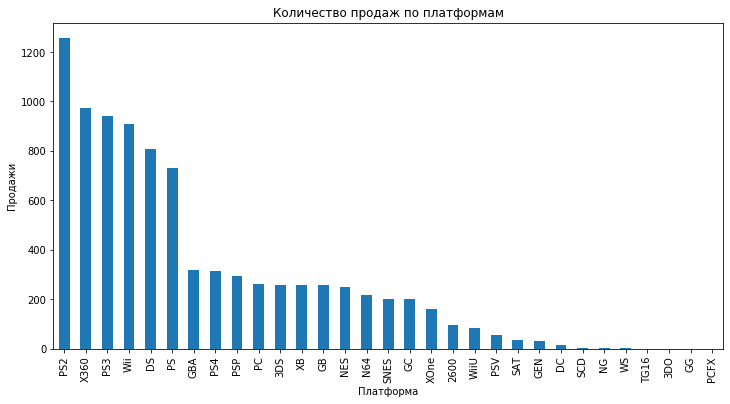

In [26]:
create_bar_plot(platform_sales)

- Посмотрим на платформы по годам

In [27]:
def years_for_platform(name, data):
    return (data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending=False))

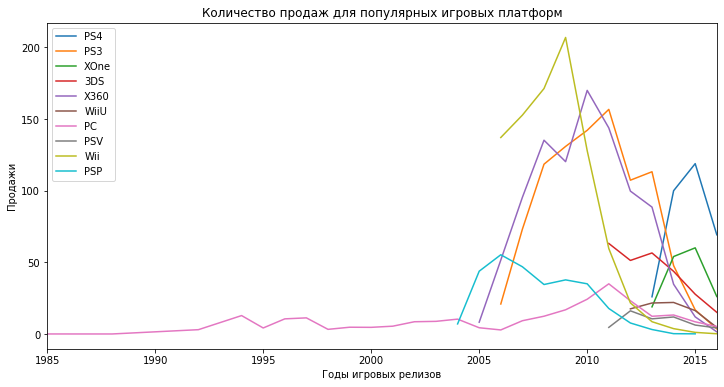

In [28]:
for i in list(recent_platform_data.index):
    years_for_platform(i, data)['total_sales'].plot(figsize=(12, 6), label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Продажи')
    plt.legend()

В среднем платформа живет 10 лет 

- Лидирующие платформы

In [29]:
recent_years = (data['year_of_release'] > 2013) & (data['year_of_release'] <= 2016)
recent_games = data.loc[recent_years]

In [30]:
recent_games_sales_total = recent_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

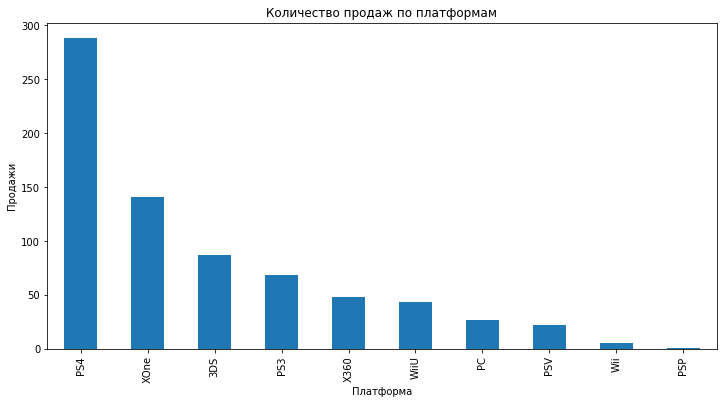

In [31]:
create_bar_plot(recent_games_sales_total)

Создадим отдельный датафрейм с нашей выборкой по годам 

In [32]:
recent_platform_data_all = (data
    .query('2013 <= year_of_release <= 2016 and platform in @recent_platform_data.index')
    .copy()
)         

Далее сделаем следующее:
1. Посмтроим боксплот по всем платформам
2. Построим боксплот по 2-мя лучшими и сравним их

Строим боксплот по всем платформам

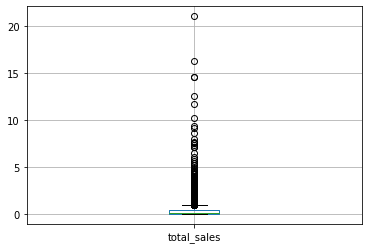

In [33]:
(recent_platform_data_all
    .boxplot(column=['total_sales'])
)

In [34]:
(recent_platform_data_all
   ['total_sales'].describe()
)

count    2225.000000
mean        0.489506
std         1.237281
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

 Боксплот для PS4

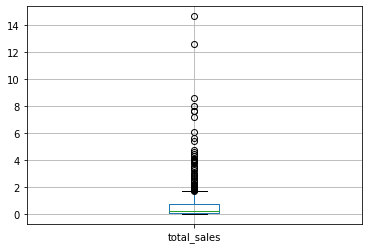

In [35]:
(recent_platform_data_all
    .query('platform =="PS4"')
    .boxplot(column=['total_sales'])
)

In [36]:
(recent_platform_data_all
    .query('platform =="PS4"')
    ['total_sales'].describe()
)

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Боксплот для XOne

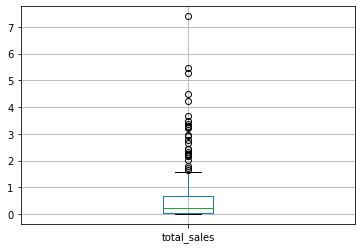

In [37]:
(recent_platform_data_all
    .query('platform =="XOne"')
    .boxplot(column=['total_sales'])
)

In [38]:
(recent_platform_data_all
    .query('platform =="XOne"')
    ['total_sales'].describe()
)

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Боксплот для 3DS

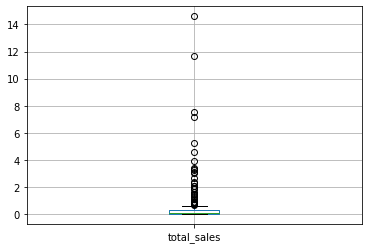

In [39]:
(recent_platform_data_all
    .query('platform =="3DS"')
    .boxplot(column=['total_sales'])
)

In [40]:
(recent_platform_data_all
    .query('platform =="3DS"')
   ['total_sales'].describe()
)

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

Бокспло для WiiU

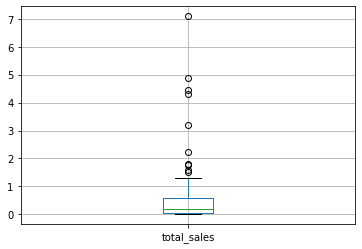

In [41]:
(recent_platform_data_all
    .query('platform =="WiiU"')
    .boxplot(column=['total_sales'])
)

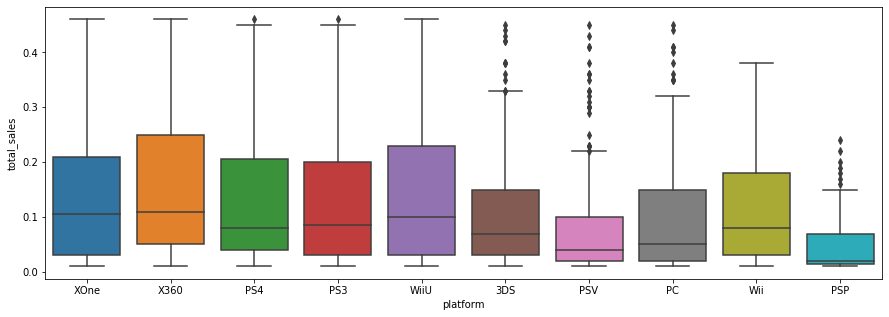

In [42]:
top_quantile = recent_platform_data_all['total_sales'].quantile(0.75)
low_quantile = recent_platform_data_all['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = recent_platform_data_all.query('total_sales <= @threshold'),ax=ax)  

- У платформ PS4, PS3 и Wii большая часть значений больше медианного. Наиболее равномерно распределены значения у платформы XOne, DS

In [43]:
(recent_platform_data_all
    .query('platform =="WiiU"')
    ['total_sales'].describe()
)

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64

Смотря на данные видим:

- средние показатели продаж по платформам mean = 0,5, median = 0,15, std = 1,4
- платформа PS4 mean = 1,1 , median = 0,3 , std = 1,9
- платформа XOne mean = 0,8 , median = 0,35 , std = 1,2
- платформа 3DS mean = 0,5 , median = 0,13 , std = 1,5
- платформа WiiU mean = 0,6 , median = 0,22 , std = 1,1

**ВЫВОД**
Самой популярной платформой является - PS4, с самыми высокими показателями продаж. Думаю это связано с тем, что платформа была выпущена в 2013 году и произвела фурор, отсюда и высокие показатели всего за два года

Посмотрим как влияют на продажи внутри одной популярной платформы, в данном случае возьмём как самую продаваемую -  PS4, отзывы покупателей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

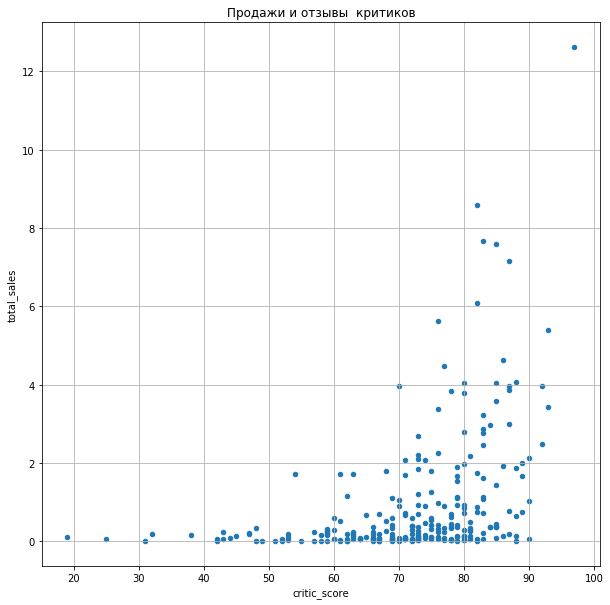

In [44]:
(recent_platform_data_all
    .query('platform == "PS4"')
    .plot(y='total_sales', x='critic_score', kind = 'scatter',legend=True, grid=True, figsize=(10, 10),title='Продажи и отзывы  критиков')
)

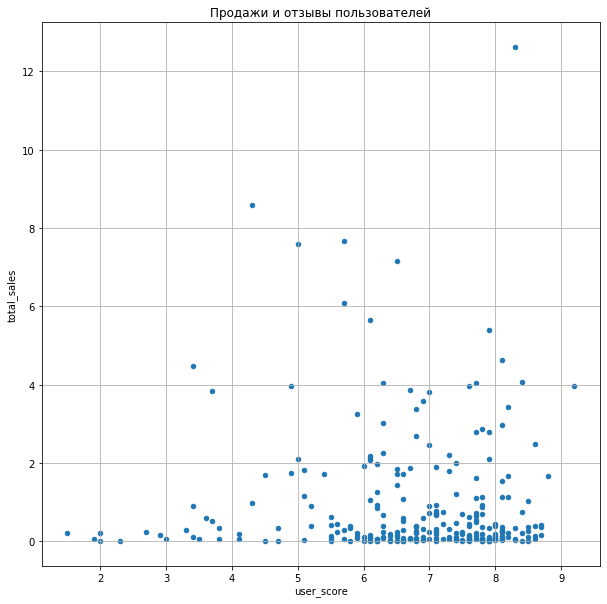

In [45]:
(recent_platform_data_all
    .query('platform == "PS4"')
    .plot(y='total_sales', x='user_score', kind = 'scatter',legend=True, grid=True, figsize=(10, 10),title='Продажи и отзывы пользователей')
)

Напишем функцию для корреляции 

In [46]:
def corr(data,platform):
    print('Корреляция продажи / оценкой критиков',str(platform),':',data.query('platform == @platform')['total_sales']
      .corr(data.query('platform == @platform')['critic_score']))
    print('Корреляция продажи / оценкой пользователей',str(platform),':', data.query('platform == @platform')['total_sales']
      .corr(data.query('platform == @platform')['user_score']))

In [47]:
corr(recent_platform_data_all,'PS4') #смотрим на корреляцию PS4

Корреляция продажи / оценкой критиков PS4 : 0.406567902061781
Корреляция продажи / оценкой пользователей PS4 : -0.031957110204556424


In [48]:
corr(recent_platform_data_all,'XOne') #смотрим на корреляцию XOne

Корреляция продажи / оценкой критиков XOne : 0.41699832800840175
Корреляция продажи / оценкой пользователей XOne : -0.06892505328279412


In [49]:
corr(recent_platform_data_all,'3DS') #смотрим на корреляцию 3DS

Корреляция продажи / оценкой критиков 3DS : 0.35705661422881035
Корреляция продажи / оценкой пользователей 3DS : 0.24150411773563016


In [50]:
corr(recent_platform_data_all,'WiiU') #смотрим на корреляцию WiiU

Корреляция продажи / оценкой критиков WiiU : 0.3764149065423912
Корреляция продажи / оценкой пользователей WiiU : 0.4193304819266187


- PS4 есть прямая корреляция с отзывами критиков, но отсутствует корреляция для отзывов покупателей
- XOne есть прямая корреляция с отзывами критиков, но отсутствует корреляция для отзывов покупателей
- 3DS есть прямая корреляция с отзывами критиков и отзывами покупателей
- WiiU есть прямая корреляция с отзывами критиков и отзывами покупателей.

Такие корреляции можно попытаться обяснить так:
1. Не равномерное распространение платформ в разных регионах
2. Пользователи дают менее объективную оценку, чем профессиональные критики

Исследуем популярность игр по жанрам 

In [51]:
recent_platform_data_all.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,15,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,15,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_info,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_info,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,15,12.62


In [52]:
(recent_platform_data_all  #посмтроим сводную таблицу
    .groupby('genre')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
)


,total_sales
,sum
genre,
Action,321.37
Shooter,232.98
Sports,150.62
Role-Playing,145.89
Misc,62.74
Platform,41.94
Racing,39.89
Fighting,35.31


- Самые прибыльными жанрами являются: Action, Shooter, Sports
- Самые не прибыльными: Adventure, Strategy, Puzzle

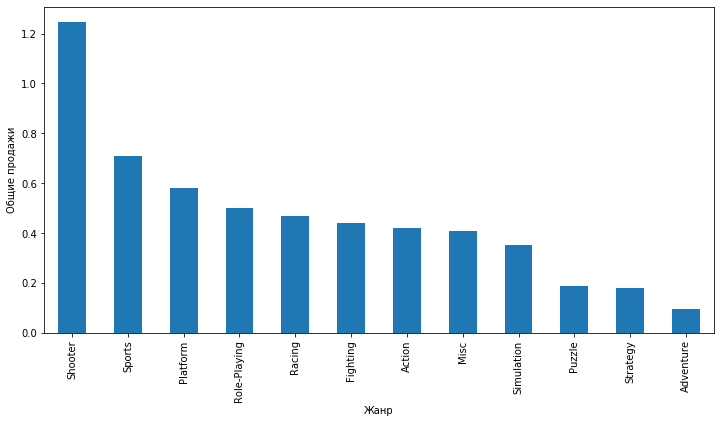

In [53]:
(recent_platform_data_all.pivot_table(index='genre', values='total_sales')
.sort_values('total_sales', ascending=False)
.plot(kind='bar', y='total_sales', figsize=(12, 6), legend=False)
.set(xlabel='Жанр', ylabel='Общие продажи'))

plt.show()

In [54]:
genre_analysis_pivot_table = recent_platform_data_all.groupby('genre').agg({'name':'count','total_sales':['median','sum']})

In [55]:
genre_analysis_pivot_table.columns = ['count', 'median','sum']

In [56]:
genre_analysis_pivot_table = genre_analysis_pivot_table.sort_values(by = 'sum', ascending = False)

In [57]:
genre_analysis_pivot_table

,count,median,sum
genre,,,
Action,764,0.110,321.37
Shooter,187,0.450,232.98
Sports,213,0.240,150.62
Role-Playing,292,0.125,145.89
Misc,154,0.105,62.74
Platform,72,0.225,41.94
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,244,0.030,23.61


Из данных видно, что не всегда количество игр в жанре гарантирует хорошие продажи. В жанре Adventure выпущено много игр, но присутствует маленькое медианное значение продаж. Но можно так же заметить обратные случаи. Например в жанре Simulation медианное значение продаж приближается к максимуму среди всех остальных жанров, но кол-во игр значительно меньше. Если брать самые прибыльные жанры, то замечаем, что они сочетают в себе два параметра - большое кол-во игр и высокое медианное значение. 

# 4. Потрет пользователей

Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Определим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [58]:
recent_platform_data_all.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,15,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,15,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_info,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_info,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,15,12.62


In [59]:
platforms = (recent_platform_data_all #сводная таблица для NA региона 
    .groupby('platform')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    437.14
dtype: float64
          sum_sales
platform           
PS4          108.74
XOne          93.12
X360          81.66
PS3           63.50
3DS           38.20
WiiU          29.21
PC            11.11
Wii            6.56
PSV            5.04
PSP            0.00


Text(0, 0.5, 'Процент от всех продаж')

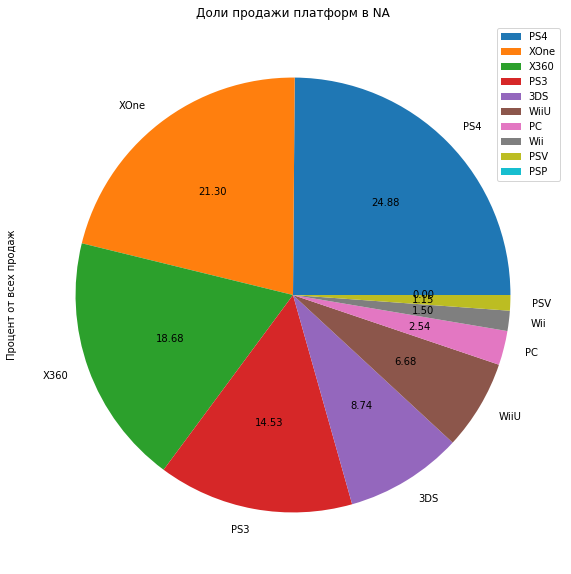

In [60]:
#создадим pie диаграмму для NA, так как считаю её наиболее информативной для данного вопроса
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в NA')
plt.ylabel('Процент от всех продаж')

In [61]:
genres = (recent_platform_data_all #сводная таблица по жанрам для NA
    .groupby('genre')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    437.14
dtype: float64
              sum_sales
genre                  
Action           125.83
Shooter          109.74
Sports            65.27
Role-Playing      46.40
Misc              27.46
Platform          17.93
Fighting          15.55
Racing            12.96
Adventure          7.14
Simulation         4.75
Strategy           3.28
Puzzle             0.83


Text(0, 0.5, 'Процент от всех продаж')

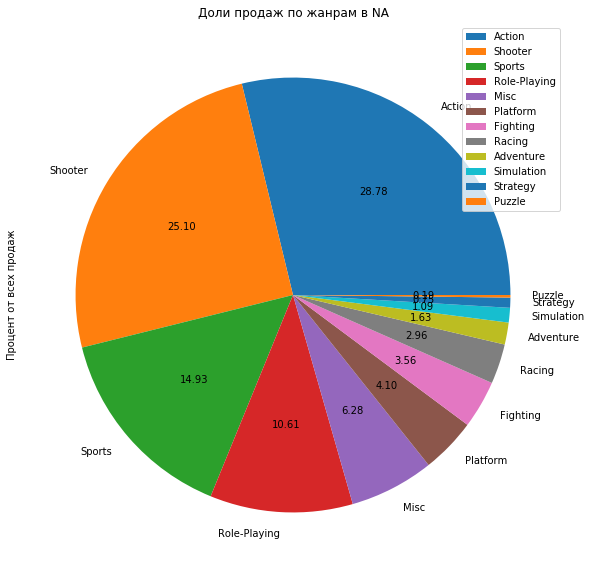

In [62]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в NA')
plt.ylabel('Процент от всех продаж')

In [63]:
ratings = (recent_platform_data_all #сводная таблица для рейтинга в NA
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    437.14
dtype: float64
         sum_sales
rating            
15.0        165.21
no_info      89.18
6.0          78.94
10.0         54.02
13.0         49.79


Text(0, 0.5, 'Процент от всех продаж и возраста ')

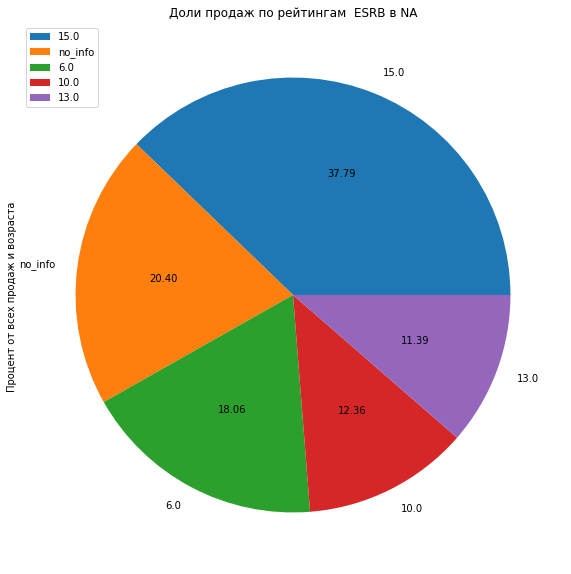

In [64]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в NA')
plt.ylabel('Процент от всех продаж и возраста ')

**ВЫВОДЫ ПО NA**

- В NA самыми популярными платформами являются - X360, PS3, Wii, DS, PS4
- В NA топ 5 популярных жанров Action, Sports, Shooter, Misc, Role-Playing. Самыми популярынми жанрами являются - Action, Shooter, Sports, Misc, Role-Playing. 
- В NA самыми продаваемыми играми являются игры 15+ и 6+

**Разбрем EU регион**

In [65]:
platforms = (recent_platform_data_all
    .groupby('platform')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    391.38
dtype: float64
          sum_sales
platform           
PS4          141.09
PS3           67.81
XOne          51.59
X360          42.52
3DS           30.96
PC            25.36
WiiU          19.85
PSV            6.10
Wii            5.93
PSP            0.17


Text(0, 0.5, 'Процент от всех продаж')

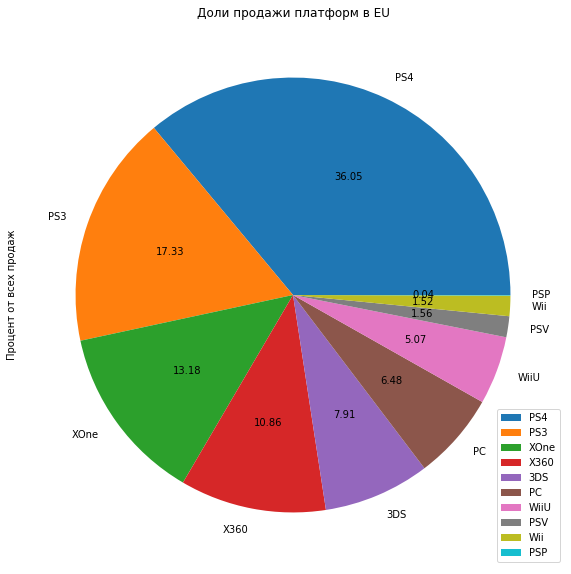

In [66]:
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в EU')
plt.ylabel('Процент от всех продаж')

In [67]:
genres = (recent_platform_data_all
    .groupby('genre')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    391.38
dtype: float64
              sum_sales
genre                  
Action           117.89
Shooter           87.86
Sports            60.49
Role-Playing      36.97
Racing            20.19
Misc              20.00
Platform          15.15
Simulation        10.84
Fighting           8.55
Adventure          8.22
Strategy           4.22
Puzzle             1.00


Text(0, 0.5, 'Процент от всех продаж')

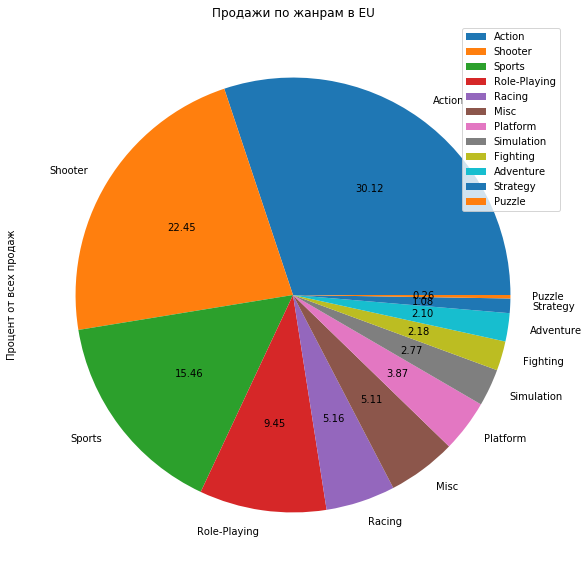

In [68]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Продажи по жанрам в EU')
plt.ylabel('Процент от всех продаж')

In [69]:
ratings = (recent_platform_data_all
    .groupby('rating')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    391.38
dtype: float64
         sum_sales
rating            
15.0        145.32
6.0          82.97
no_info      78.61
10.0         42.53
13.0         41.95


Text(0, 0.5, 'Процент от всех продаж и возраста')

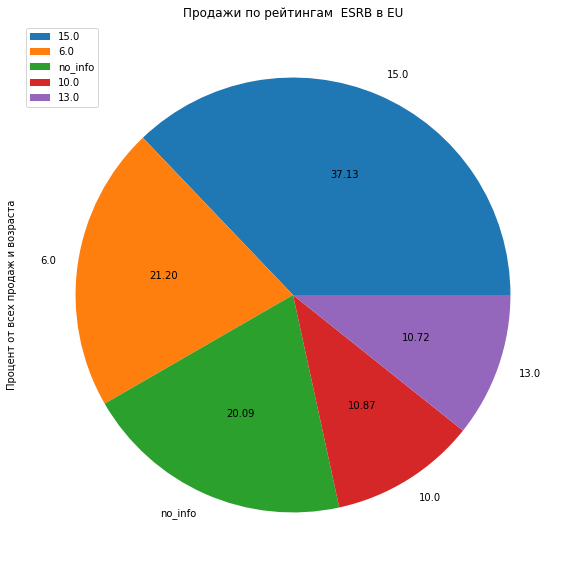

In [70]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Продажи по рейтингам  ESRB в EU')
plt.ylabel('Процент от всех продаж и возраста')

**ВЫВОДЫ ПО EU**

- В EU самыми популярными платформами являются: PS3, X360, WiiU, PS4, PC
- В EU самыми популярными жанрами являются: Action, Shooter, Sports, Misc, Role-Playing
- В EU самыми продаваемыми играми являются игры 15+ и 6+

**Разбрем JP регион**

In [71]:
platforms = (recent_platform_data_all
    .groupby('platform')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    140.78
dtype: float64
          sum_sales
platform           
3DS           67.81
PS3           23.35
PSV           18.59
PS4           15.96
WiiU          10.88
PSP            3.29
X360           0.51
XOne           0.34
Wii            0.05
PC             0.00


Text(0, 0.5, 'Процент от всех продаж')

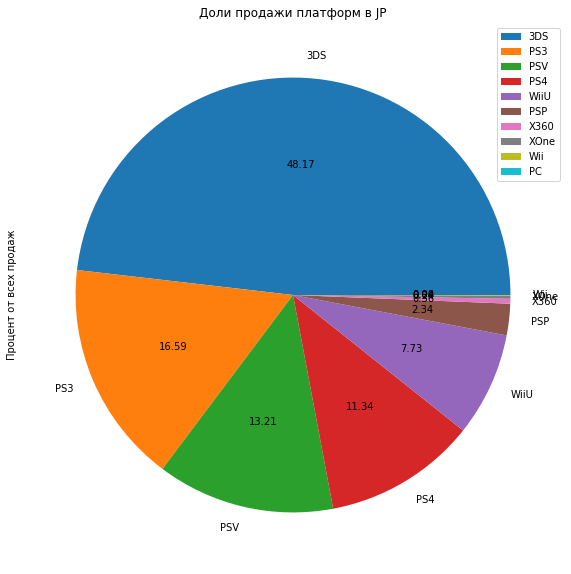

In [72]:
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в JP')
plt.ylabel('Процент от всех продаж')

In [73]:
genres = (recent_platform_data_all
    .groupby('genre')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    140.78
dtype: float64
              sum_sales
genre                  
Role-Playing      51.04
Action            40.49
Misc               9.20
Fighting           7.65
Shooter            6.61
Adventure          5.82
Sports             5.41
Platform           4.79
Simulation         4.52
Racing             2.30
Strategy           1.77
Puzzle             1.18


Text(0, 0.5, 'Процент от всех продаж')

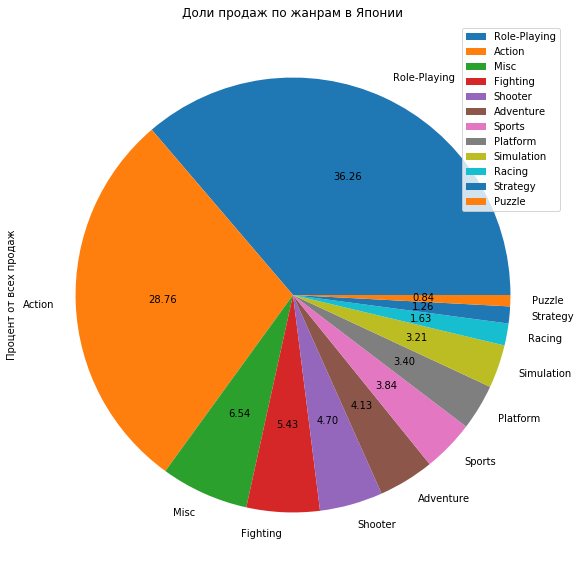

In [74]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Японии')
plt.ylabel('Процент от всех продаж')

In [75]:
ratings = (recent_platform_data_all
    .groupby('rating')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    140.78
dtype: float64
         sum_sales
rating            
no_info      85.05
13.0         20.59
6.0          15.14
15.0         14.11
10.0          5.89


Text(0, 0.5, 'Процент от всех продаж и возраста')

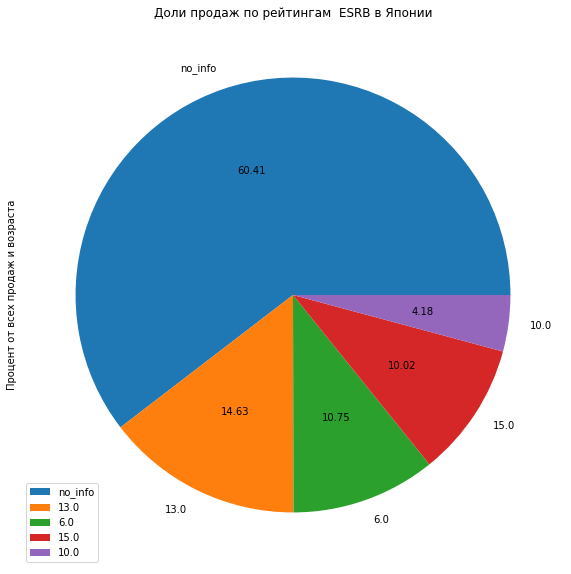

In [76]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Японии')
plt.ylabel('Процент от всех продаж и возраста')

**ВЫВОДЫ ПО JP**

- В JP самыми популярными платформами являются: 3DS, PS3, DS, PSP, Wii
- В JP самыми популярными жанрами являются: Role-Playing, Action, Misc, Sports, Role-Platform
- В JP довольно сложно дать оценку самому мажроному куску в виду отсутствия данных из рейтинга ESRB (предполагаю, потому что в Японии своя система оценки). Но с данными, что есть можно оценить, что рейтинги  6+ и 13+ являются самыми продаваемыми 

**РЕЗЕЛЬТАТЫ ПО ВСЕМ РЕГИОНАМ В ОДНОМ МЕСТЕ** 

1. NA Регион:
- В NA самыми популярными платформами являются - PS4, Xone, X360, PS3
- В NA топ 5 популярных жанров Action, Sports, Shooter,  Role-Playing.
- В NA самыми продаваемыми играми являются игры 15+ и 6+


2. EU регион
- В EU самыми популярными платформами являются: PS4,PS3, XOne, X360
- В EU самыми популярными жанрами являются: Action, Shooter, Sports,Role-Playing
- В EU самыми продаваемыми играми являются игры 15+ и 6+


3. JP регион 
- В JP самыми популярными платформами являются: 3DS, PS3, DS, PSV, PS4 
- В JP самыми популярными жанрами являются: Role-Playing, Action, Misc, Fighting
- В JP довольно сложно дать оценку самому мажроному куску в виду отсутствия данных из рейтинга ESRB (предполагаю, потому что в Японии своя система оценки). Но с данными, что есть можно оценить, что рейтинги 6+ и 13+ являются самыми продаваемыми

# 5. Провека гипотез

Проверяем две гипотезы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H₀:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Альтернативная гипотеза H₁:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [77]:
pc = recent_platform_data_all[recent_platform_data_all['platform'] == 'PC'] 
xone = recent_platform_data_all[recent_platform_data_all['platform'] == 'XOne']

alpha = .05
results = st.ttest_ind(pc['user_score'], xone['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  0.1401265840361139
Не получилось отвергнуть Нулевую гипотезу


- У нас не получилось опровергнуть нулевую гипотезу с альфа - 5%. Исходя из этого в альтернативной гипотезе средние пользовательские рейтинги могут отличаться. Исходя из значения p-value - хоть средний пользовательский рейтинг и не одинаков, но с вероятностью 17%  такое или большее различие можно получить случайно.
- По итогу имеем слишком большую вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами.

# 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H₀:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Альтернативная гипотеза H₁:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [78]:
action = recent_platform_data_all[recent_platform_data_all['genre'] == 'Action'] 
sports = recent_platform_data_all[recent_platform_data_all['genre'] == 'Sports']

alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  7.10236653346437e-28
Отвергаем Нулевую гипотезу


- Мы смогли опровергнуть нулевую гипотезу о равенстве генеральных совокупностей, значит делать выводы по данным разных жанров мы не можем

# 6. Общий вывод (обновлены)

С данными проделали работу:
- Привели колонки к нижнему регистру
- Изменили тип данных в data['user_score']
- Заменили числовые рейтинги на категории
- В рейтингах заполнили пропуски 
- Добавили суммарные продажи во всех регионах 

Проанализировали данные и сделали выводы, что:
- Средний срок жизни платформы около 10 лет 
- Самыми лидирущеми платформами являются PS и XBox
- Видно отсутствие корреляции между отзывами пользователей и продажами для PS4. 
- Видим прямую корреляцию между отзывами критиков и объёмом продаж игр
- Самые прибыльными жанрами являются: Action, Shooter, Sports
- Самые не прибыльными: Adventure, Strategy, Puzzle

Составили портрет пользователей: 

1. NA Регион:
- В NA самыми популярными платформами являются - PS4, Xone, X360, PS3
- В NA топ 5 популярных жанров Action, Sports, Shooter,  Role-Playing.
- В NA самыми продаваемыми играми являются игры 15+ и 6+


2. EU регион
- В EU самыми популярными платформами являются: PS4,PS3, XOne, X360
- В EU самыми популярными жанрами являются: Action, Shooter, Sports,Role-Playing
- В EU самыми продаваемыми играми являются игры 15+ и 6+


3. JP регион 
- В JP самыми популярными платформами являются: 3DS, PS3, DS, PSV, PS4 
- В JP самыми популярными жанрами являются: Role-Playing, Action, Misc, Fighting
- В JP довольно сложно дать оценку самому мажроному куску в виду отсутствия данных из рейтинга ESRB (предполагаю, потому что в Японии своя система оценки). Но с данными, что есть можно оценить, что рейтинги 6+ и 13+ являются самыми продаваемыми


Мы проверили гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.

- Средние пользовательские рейтинги жанров Action и Sports разные. У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров